In [1]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import LongTraceSimulator
import matplotlib.pyplot as plt
from OptimumFilter import *
import DELightStyle

plt.rcParams['font.family'] = 'DejaVu Sans'  # Matplotlib's default font



def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict
def plot_qp_traces_offset_clean(traces, fs=3_906_250, offset_step=70, title="QP Traces"):
    """
    Cleanly plots all QP traces with vertical offset and time in milliseconds,
    using DELight annotations and styling.

    Parameters:
    -----------
    traces : array-like, shape (43, N) or (1, 43, N)
        Array of raw traces from multiple channels.
    fs : float
        Sampling frequency in Hz (default: 3.90625 MHz).
    offset_step : float
        Vertical offset between channels.
    title : str
        Title for the plot.
    """
    # Unwrap singleton batch if needed
    if traces.shape[0] == 1:
        traces = traces[0]

    num_channels, num_samples = traces.shape
    time_ms = np.arange(num_samples) / fs * 1000  # Time in ms

    fig, ax = plt.subplots(figsize=(24, 24))

    for i in range(num_channels):
        color = 'orange' if i > 44 else '#1f77b4'

        ax.plot(time_ms, traces[i] + i * offset_step, lw=0.3, c=color)

    ax.set_xlabel("Time [ms]", fontsize=28)
    ax.set_ylabel("ADC cpounts + offset", fontsize=28)
    ax.set_xlim(0, np.max(time_ms))
    ax.set_ylim(-10, offset_step * (num_channels + 3))
    ax.set_yticks([])
    ax.set_title(title)

    # DELight annotations
    DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.02)
    DELightStyle.display_text(ax, "simulation", x0=0.9, y0=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # prevent clipping of annotations
    plt.show()
config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/wk11/config.yaml')
lts = LongTraceSimulator(config)

In [2]:
trace, idx= lts.generate(
            E=7000,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=False
        )

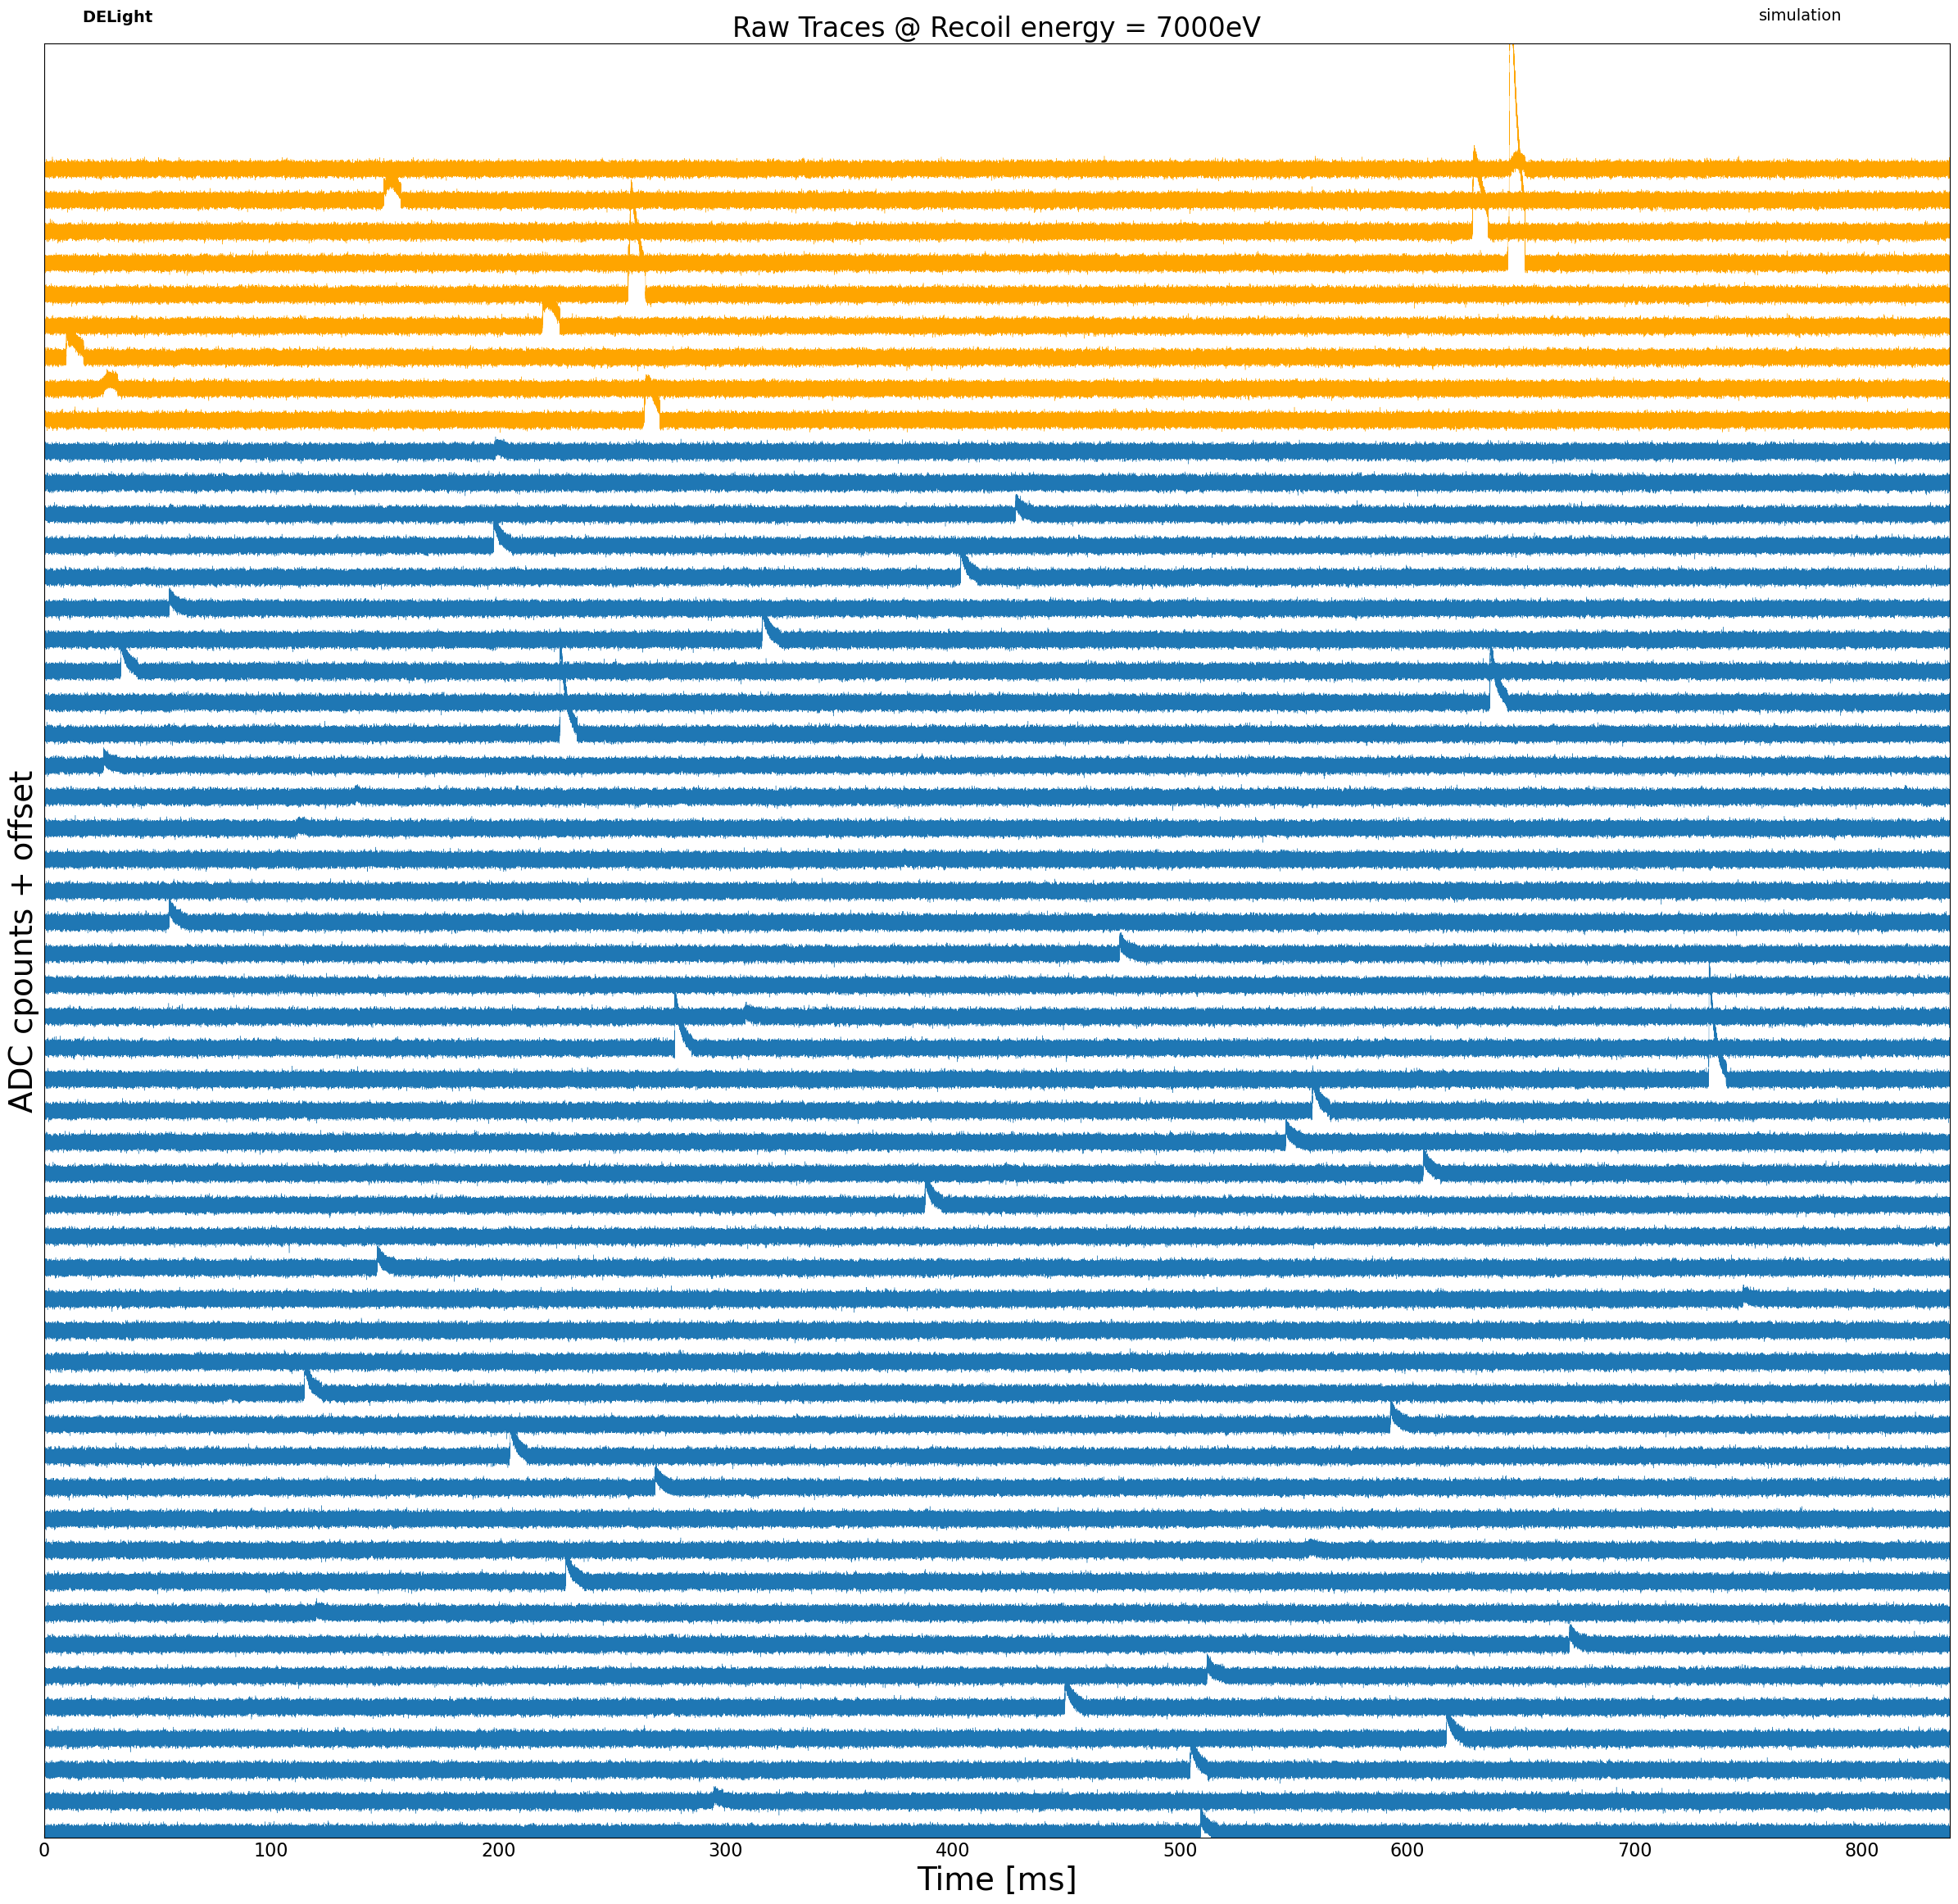

In [3]:
plot_qp_traces_offset_clean(trace[0], title = "Raw Traces @ Recoil energy = 7000eV")

In [4]:
idx

array([[1985381, 1148406, 1968011, 2408416, 1752451, 1996512, 2619946,
         464144,  893908, 2171539, 2088548, 1047994,  797910, 2311825,
         445059, 2898306,  743030, 2917745,  569954, 1153357, 1511849,
        2368209, 2131826, 2177887, 2859593, 1081611, 1202723, 2026932,
        1846589,  212086,  403005, 1475831,  433363,  532275,   99246,
         883969, 2483348,  129086, 1231665,  212287, 1573355,  770601,
        1667838, 3107401,  773363, 1026275,   93988,   35527,  854173,
        1001637, 2514003, 2450526,  581502, 2513704]])

In [ ]:
of = OptimumFilter(channel_template, noise_psd, sampling_frequency)